### 붓꽃 데이터 분류

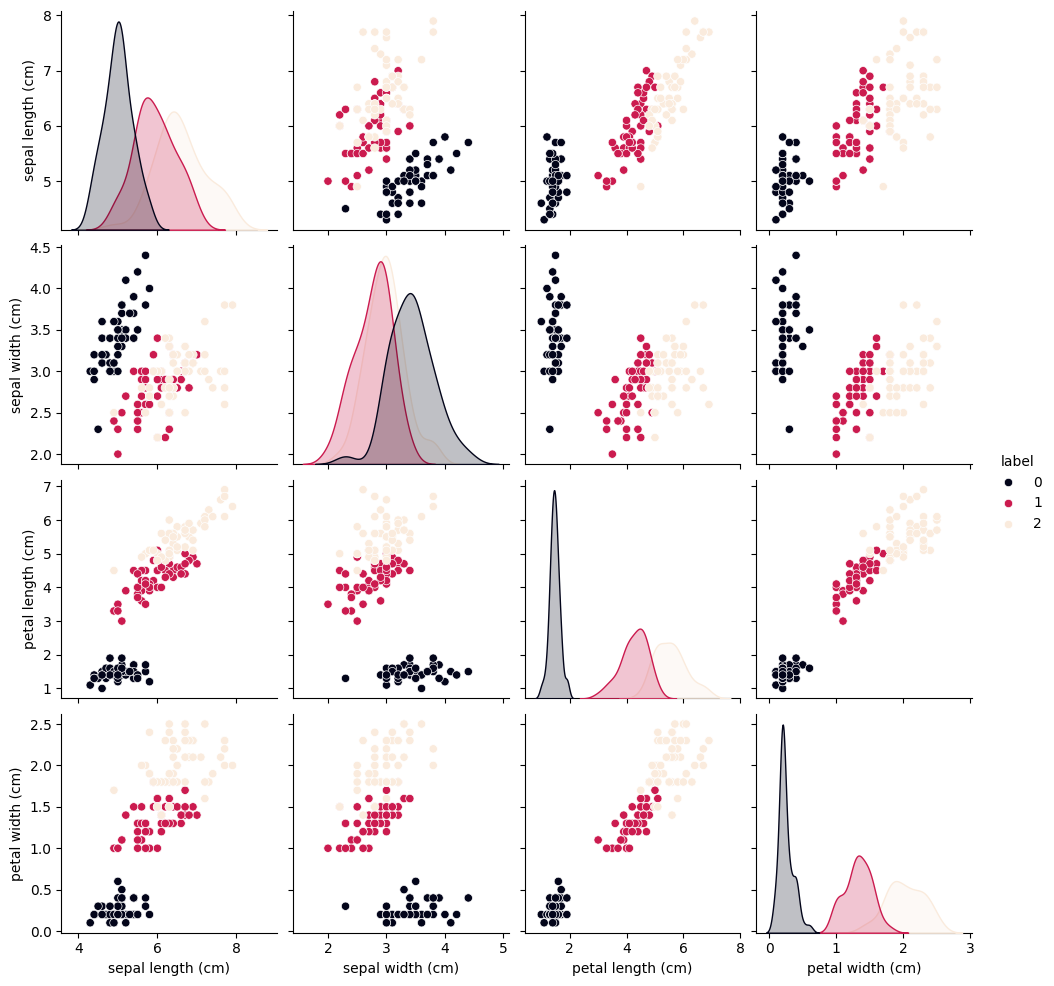

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

# iris.data: 피처
iris_data = iris.data
# iris.target: 레이블
iris_label = iris.target

# 붓꽃 데이터 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target

# 시각화
sns.pairplot(data=iris_df, hue='label', palette='rocket')

<Axes: >

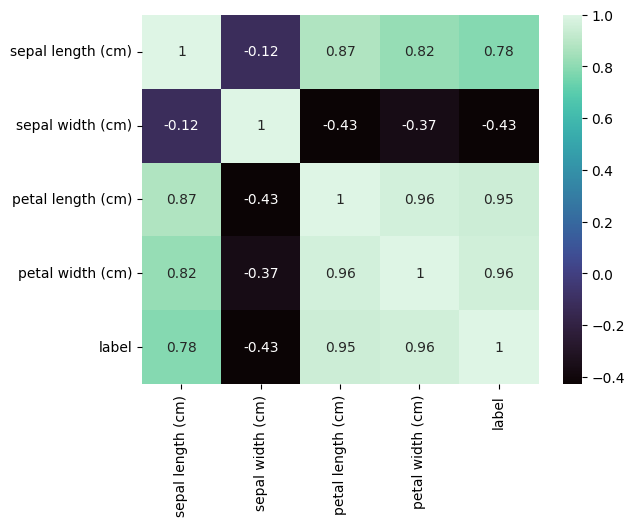

In [2]:
sns.heatmap(data=iris_df.corr(), annot=True, cmap='mako')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# 학습용 데이터와 테스트용 데이터로 분리
X = iris_df.drop(labels='label', axis=1)
y = iris_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=42)

# 학습 (학습 데이터를 사용하여 fit)
dt_clf.fit(X_train, y_train)

# 성능 평가하기
# 정확도는 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 분류결과 리포트 생성
print(classification_report(y_test, pred))

예측 정확도: 0.9667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



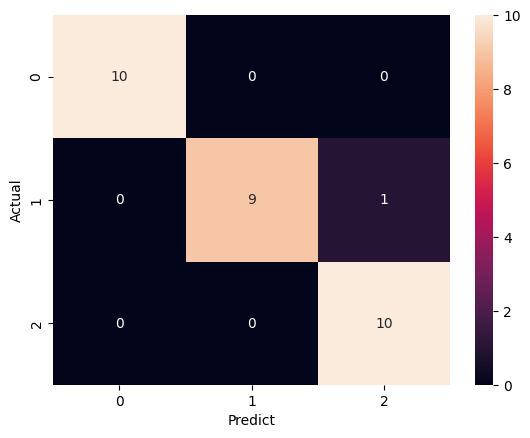

In [4]:
# 혼동행렬 시각화
cm = confusion_matrix(y_test, pred, labels=[0,1,2])
sns.heatmap(cm, annot=True)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

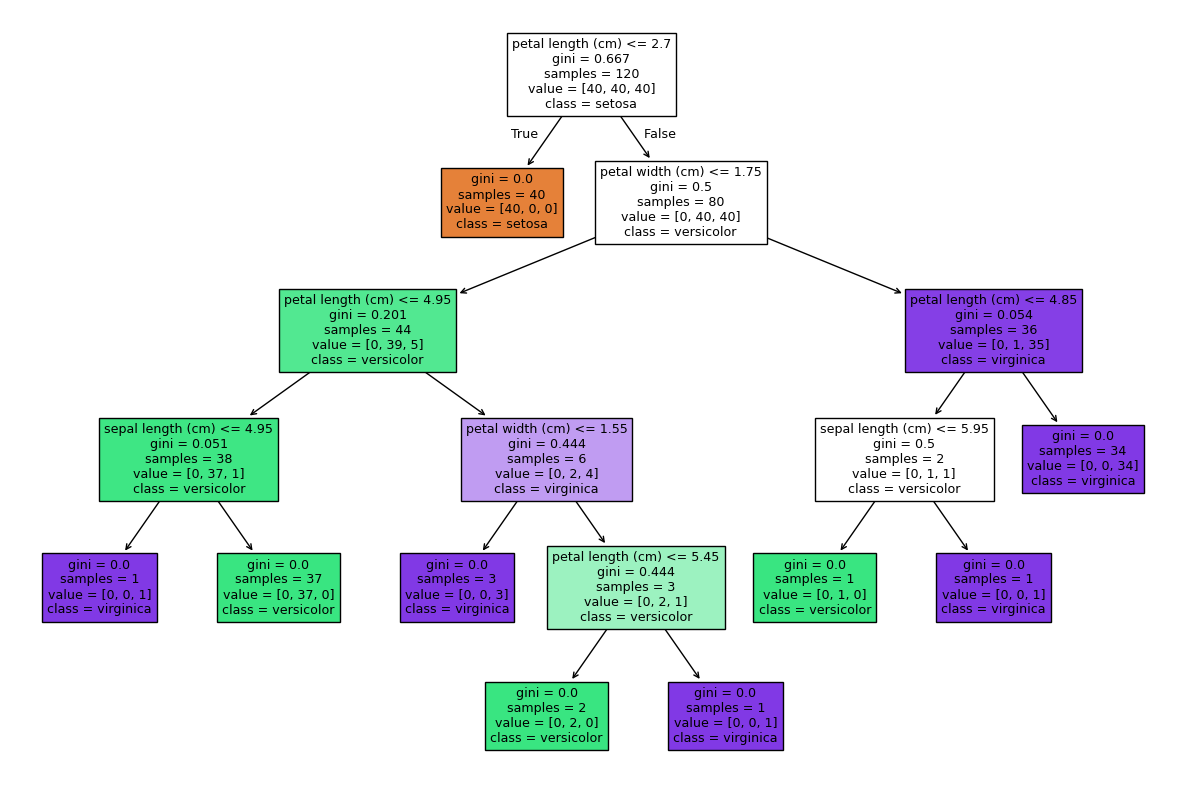

In [5]:
from sklearn.tree import plot_tree

# 트리구조 시각화
plt.figure(figsize=(15,10))
plot_tree(dt_clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

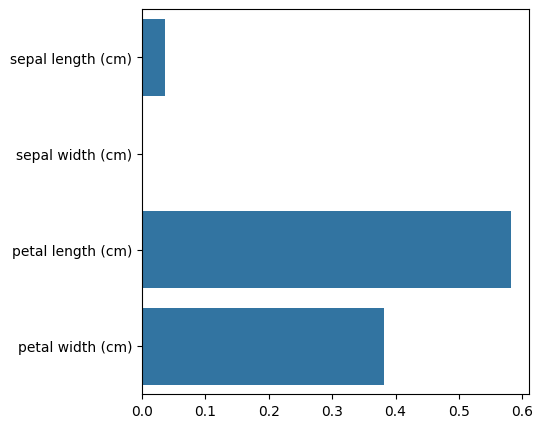

In [13]:
# 속성 중요도 시각화
dt_clf.feature_importances_

plt.figure(figsize=(5,5))
sns.barplot(y=iris.feature_names, x=dt_clf.feature_importances_)
plt.show()

### 교차검증

In [9]:
# 훈련데이터로 교차검증
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeClassifier()

cv_scores_accuracy = cross_val_score(model, X = X_train, y = y_train, scoring = 'accuracy', cv = skf)
cv_scores_f1= cross_val_score(model, X = X_train, y = y_train, scoring = 'f1_macro', cv = skf)

print('accuracy : ', cv_scores_accuracy)
print('accuracy ave : ', cv_scores_accuracy.mean())
print('f1 : ', cv_scores_f1)
print('f1 ave : ', cv_scores_f1.mean())

# 학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

accuracy :  [0.91666667 0.95833333 0.83333333 0.95833333 0.95833333]
accuracy ave :  0.925
f1 :  [0.8745098  0.95816993 0.83333333 0.91534392 0.95816993]
f1 ave :  0.9079053843759727


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

### GridSearchCV

In [10]:
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

parameters = {'max_depth' : [3, 4, 5], 'min_samples_split' : [2, 4]}
gscv = GridSearchCV(model, param_grid=parameters, cv=skf, refit=True)
gscv.fit(X_train, y_train)

# GridSearchCV 결과확인
best_model = gscv.best_estimator_
pred = best_model.predict(X_test)

# 최종 평가
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



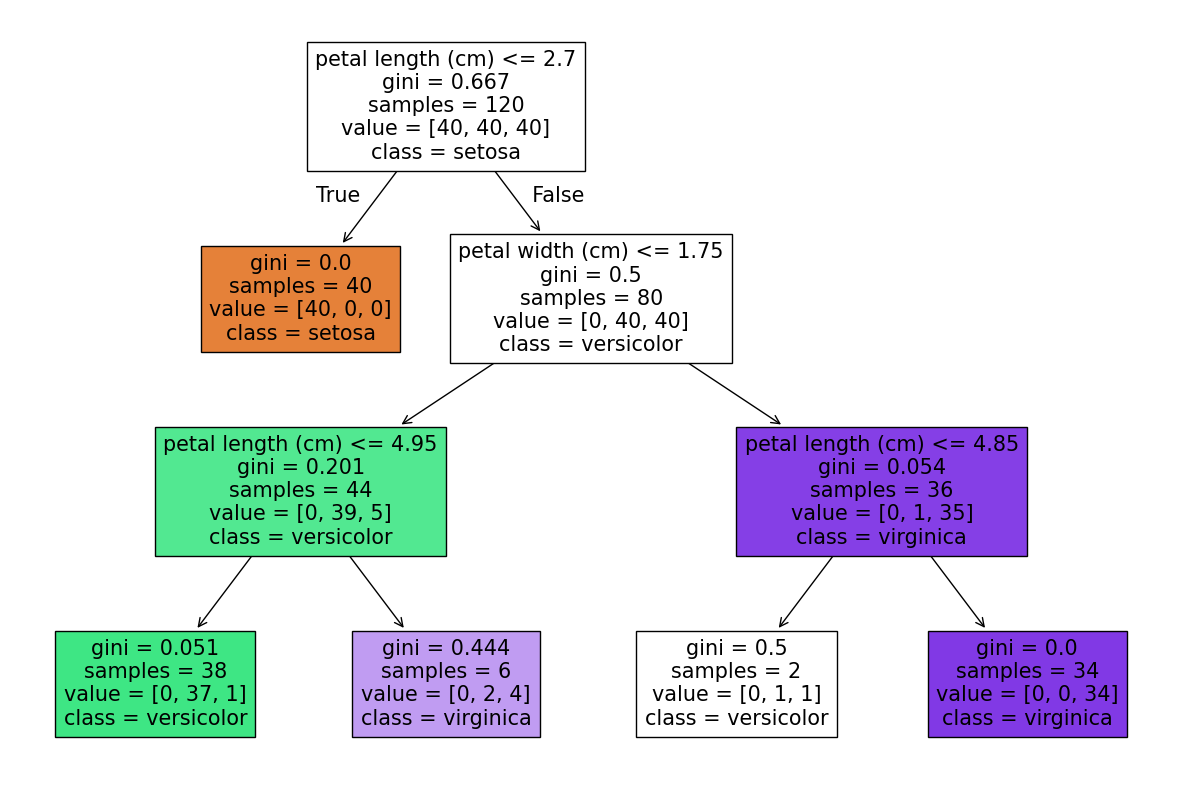

In [11]:
# 트리 구조 시각화
plt.figure(figsize=(15,10))
plot_tree(best_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

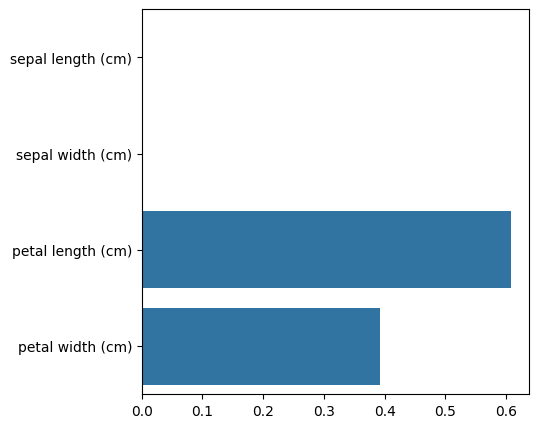

In [14]:
# 속성 중요도 시각화
dt_clf.feature_importances_

plt.figure(figsize=(5,5))
sns.barplot(y=iris.feature_names, x=best_model.feature_importances_)
plt.show()